# Lab 3 # comparing models and scaling effect

- Name:
- Student ID:

In this lab, the main objective is to understand the different models and compare their capabilities, we also look at scaling and how applying it helps in certain machine learning models.

By the end of this lab you should have:

- gained experience with building different models and ploting the results.
- a better understanding of scaling and how it affects different models. 

### Grading

This lab will be graded as follows:
- 50% for comments/text
    - Half of the lab grade will come from an assessment of the comments/text included in your Jupyter notebook submission
        - The comments/text should explain clearly what you are doing and why it's necessary to achieve the objective
        - You should think of the comments/text as if you were creating a tutorial/blog to guide someone through your work 
- 50% for code
    - Half of the lab grade will come from an assessment of your code
        - The code in the notebook should use base python, NumPy, Pandas, sklearn, and/or matplotlib. 
        - All code cells should run error free
        - The code does not have to be optimized or pretty: it needs to be functional for the specific task

### Submition

This is a **group submission** lab, so work in the same groups that you are already assigned to.

You should submit the following:
- a well-commented Jupyter notebook
- the original dataset used as a .csv file

### Instructions
Find a publicly available dataset and load it using Pandas:

The dataset should include at least 1,000 rows, 4 different features where one of these features is a categorical feature, and a binary class.

Make sure to explain your findings at each step, especially steps (1,8 and 9).

Use the last 3 digits from any of your group team members user ID as a random state variable where applicable and do implement the following:

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

1- By observing the data and without building a classification model, find out if the data requires scaling or not, and explain how you came to your conclusion and confirm this with a plot of the data.

In [177]:
## This dataset is well-known patient dataset. In this dataset each patient is suffer from Heart failure or not based on major factors such as
## Avg heart beat/min, palpitation/day, cholestrol, BMI, Age, Sex, Family History, Smoker last 5 years and exercise/min.
## so we are making a classfication model on heart failure based on these 7 features.

## Based on dataset some features values are lower and some features values are higher so we need to scale our data before making a classfication model.

patient = pd.read_csv('Patient Data.csv')
patient.head()

,AVGHEARTBEATSPERMIN,PALPITATIONSPERDAY,CHOLESTEROL,BMI,HEARTFAILURE,AGE,SEX,SMOKERLAST5YRS,EXERCISEMINPERWEEK
0,93,22,163,25,0,49,F,N,110
1,108,22,181,24,0,32,F,N,192
2,86,0,239,20,0,60,F,N,121
3,80,36,164,31,1,45,F,N,141
4,66,36,185,23,0,39,F,N,63


In [8]:
patient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10800 entries, 0 to 10799
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   AVGHEARTBEATSPERMIN  10800 non-null  int64 
 1   PALPITATIONSPERDAY   10800 non-null  int64 
 2   CHOLESTEROL          10800 non-null  int64 
 3   BMI                  10800 non-null  int64 
 4   HEARTFAILURE         10800 non-null  int64 
 5   AGE                  10800 non-null  int64 
 6   SEX                  10800 non-null  object
 7   FAMILYHISTORY        10800 non-null  object
 8   SMOKERLAST5YRS       10800 non-null  object
 9   EXERCISEMINPERWEEK   10800 non-null  int64 
dtypes: int64(7), object(3)
memory usage: 843.9+ KB


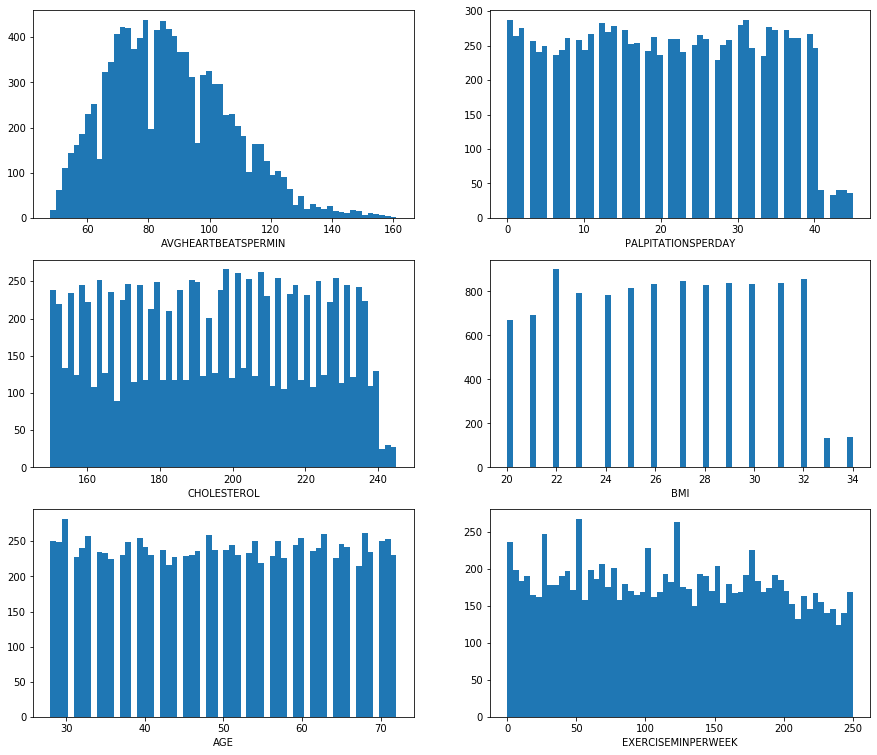

In [178]:
## In each column some values are between 0-50(Palpitation/day column), some values are between 40-160(Average heartbeat/min),
## some values are between 140-250 (Cholestrol column ), some values are between 20-34 (BMI column) 
## based on plotting all the column we are seeing that some columns values are lower than other column so we need to scale our dataset using various scaling technique.
patient_plotting = patient.drop(columns=['HEARTFAILURE','SMOKERLAST5YRS','SEX']) 
plt.figure(figsize=(15,13))
for i,col in enumerate(patient_plotting):
    plt.subplot(3,2,i+1)
    plt.xlabel(col)
    plt.hist(patient_plotting[col],bins=60)

In [179]:
## Before scaling the data we need to create a dummy variables for categorical features.
patient_dummies = pd.get_dummies(patient)
patient_dummies.head()

,AVGHEARTBEATSPERMIN,PALPITATIONSPERDAY,CHOLESTEROL,BMI,HEARTFAILURE,AGE,EXERCISEMINPERWEEK,SEX_F,SEX_M,SMOKERLAST5YRS_N,SMOKERLAST5YRS_Y
0,93,22,163,25,0,49,110,1,0,1,0
1,108,22,181,24,0,32,192,1,0,1,0
2,86,0,239,20,0,60,121,1,0,1,0
3,80,36,164,31,1,45,141,1,0,1,0
4,66,36,185,23,0,39,63,1,0,1,0


2- Apply the MinMaxScaler on the data and save it into a scaled version of the data.

In [180]:
## Before builiding a model we need to scale our dataset using MinMax scaling technique.
## For the original dataset we are stroing all the independent features into the X object and storing the dependent features into the Y object
X = patient_dummies.drop(columns=['HEARTFAILURE'])
Y = patient_dummies['HEARTFAILURE']

## For the scaled dataset we are stroing all the independent features into the X_1 object and storing the dependent features into the Y_1 object
X_1 = patient_dummies.drop(columns=['HEARTFAILURE'])
Y_1 = patient_dummies['HEARTFAILURE']

## Now we are scaling all independent features using MinMax scaling technique which are stored in the X_1 object.
Scale = MinMaxScaler()
X_1_Scaling = Scale.fit_transform(X_1)

3- Split the data into 5% testing and 95% training data.



In [181]:
### Model-----1

## After completing data preprocessing task we are going to splitting our dataset into training and testing part.
## First we are setting a cutoff for the original dataset (5% testing and 95% training data)
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.05,random_state = 42)

## First we are setting a cutoff for the Scaled dataset (5% testing and 95% training data) 
X1_train,X1_test,Y1_train,Y1_test = train_test_split(X_1_Scaling,Y_1,test_size = 0.05,random_state = 42)

In [228]:
## Now we are building a classification model for the original data and scaled data.

## 1---- Decision Tree Classifier Model
## 2---- SGD Classifier Model
## 3---- SVC Classifier Model

decision_tree = DecisionTreeClassifier()
SGD_classifier = SGDClassifier(loss='perceptron')
SVC_classifier = SVC(kernel = 'linear')

## Original Dataset 
## Now we are fitting a original data on these model.  

DecisionTree_Model_1 = decision_tree.fit(X_train,Y_train)
SGD_Model_1 = SGD_classifier.fit(X_train,Y_train)
SVC_Model_1 = SVC_classifier.fit(X_train,Y_train)

## Scaled Dataset
## Fitting a scaled data on these Model.
DecisionTree_Model1_1 = decision_tree.fit(X1_train,Y1_train)
SGD_Model1_1 = SGD_classifier.fit(X1_train,Y1_train)
SVC_Model1_1 = SVC_classifier.fit(X1_train,Y1_train)


5- For the original data-set: calculate the accuracy of the testing and training data for each model, plot the accuracy of the three models using a single plot.

In [192]:
## Original Dataset
## After building a model and fitting the original data now we trying to calculate the accuracy score for training and testing dataset

print('Model-----1 (For the original data)\n')

## 1-- Training and testing score for the Decision Tree
print('Accuracy_score for training dataset in the decision Tree: {}'.format(DecisionTree_Model_1.score(X_train,Y_train)))
print('Accuracy_score for testing dataset in the decision Tree: {}\n'.format(DecisionTree_Model_1.score(X_test,Y_test)))

## 2-- Training and testing score for the SGD Classification model
print('Accuracy_score of training dataset in the SGD classification Model: {}'.format(SGD_Model_1.score(X_train,Y_train)))
print('Accuracy_score of testing dataset in the SGD classification Model: {}\n'.format(SGD_Model_1.score(X_test,Y_test)))

## 3-- Training and testing score for the SVC Classification Model
print('Accuracy_score of training dataset in the SVC classification Model: {}'.format(SVC_Model_1.score(X_train,Y_train)))
print('Accuracy_score of testing dataset in the SVC classification Model: {}\n'.format(SVC_Model_1.score(X_test,Y_test)))


Model-----1 (For the original data)

Accuracy_score for training dataset in the decision Tree: 0.8350877192982457
Accuracy_score for testing dataset in the decision Tree: 0.8222222222222222

Accuracy_score of training dataset in the SGD classification Model: 0.5532163742690058
Accuracy_score of testing dataset in the SGD classification Model: 0.5203703703703704

Accuracy_score of training dataset in the SVC classification Model: 0.8350877192982457
Accuracy_score of testing dataset in the SVC classification Model: 0.8222222222222222



6- For the scaled data-sets: calculate the accuracy of the testing data for each model, plot the accuracy of the three models using a single plot.



In [193]:
## Scaled Dataset
## After building a model and fitting the scaled data now we trying to calculate the accuracy score for training and testing dataset.

print('Model-----1 (For the scaled data)\n')

## 1-- Training and testing score for the Decision Tree.
print('Accuracy_score for training dataset in the decision Tree: {}'.format(DecisionTree_Model1_1.score(X1_train,Y1_train)))
print('Accuracy_score for testing dataset in the decision Tree: {}\n'.format(DecisionTree_Model1_1.score(X1_test,Y1_test)))

## 2-- Training and testing score for the SGD Classification model.
print('Accuracy_score of training dataset in the SGD classification Model: {}'.format(SGD_Model1_1.score(X1_train,Y1_train)))
print('Accuracy_score of testing dataset in the SGD classification Model: {}\n'.format(SGD_Model1_1.score(X1_test,Y1_test)))

## 3-- Training and testing score for the SVC Classification Model.
print('Accuracy_score of training dataset in the SVC classification Model: {}'.format(SVC_Model1_1.score(X1_train,Y1_train)))
print('Accuracy_score of testing dataset in the SVC classification Model: {}\n'.format(SVC_Model_1.score(X1_test,Y1_test)))

Model-----1 (For the scaled data)

Accuracy_score for training dataset in the decision Tree: 1.0
Accuracy_score for testing dataset in the decision Tree: 0.7888888888888889

Accuracy_score of training dataset in the SGD classification Model: 0.8350877192982457
Accuracy_score of testing dataset in the SGD classification Model: 0.8222222222222222

Accuracy_score of training dataset in the SVC classification Model: 0.8350877192982457
Accuracy_score of testing dataset in the SVC classification Model: 0.8222222222222222



7- Repeat steps 3 to 6 but this time increase the testing split size by 5% and decreasing the split size of the training data by 5%, do this until the testing size becomes 20% and the training size becomes 80%.


In [196]:
## Model-----2

## For the second model we are setting a cutoff for the original dataset (10% testing and 90% training data) 
X_2_train,X_2_test,Y_2_train,Y_2_test = train_test_split(X,Y,test_size = 0.10,random_state = 42)

## For the second model we are setting a cutoff for the Scaled dataset (10% testing and 90% training data) 
X1_2_train,X1_2_test,Y1_2_train,Y1_2_test = train_test_split(X_1_Scaling,Y_1,test_size = 0.10,random_state = 42)

## Now we are building a second classification model for the original data and scaled data.

## 1---- Decision Tree Classifier Model
## 2---- SGD Classifier Model
## 3---- SVC Classifier Model

decision_tree_2 = DecisionTreeClassifier()
SGD_classifier_2 = SGDClassifier(loss='perceptron')
SVC_classifier_2 = SVC(kernel = 'linear')

## Original Dataset 
## Now we are fitting a original data on these model.  

DecisionTree_Model_2 = decision_tree_2.fit(X_2_train,Y_2_train)
SGD_Model_2 = SGD_classifier_2.fit(X_2_train,Y_2_train)
SVC_Model_2 = SVC_classifier_2.fit(X_2_train,Y_2_train)

## Original Dataset
## After building a model and fitting the original data now we trying to calculate the accuracy score for training and testing dataset

print('Model-----2 (For the original data)\n')
## 1-- Training and testing score for the Decision Tree
print('Accuracy_score for training dataset in the decision Tree: {}'.format(DecisionTree_Model_2.score(X_2_train,Y_2_train)))
print('Accuracy_score for testing dataset in the decision Tree: {}\n'.format(DecisionTree_Model_2.score(X_2_test,Y_2_test)))

## 2-- Training and testing score for the SGD Classification model
print('Accuracy_score of training dataset in the SGD classification Model: {}'.format(SGD_Model_2.score(X_2_train,Y_2_train)))
print('Accuracy_score of testing dataset in the SGD classification Model: {}\n'.format(SGD_Model_2.score(X_2_test,Y_2_test)))

## 3-- Training and testing score for the SVC Classification Model
print('Accuracy_score of training dataset in the SVC classification Model: {}'.format(SVC_Model_2.score(X_2_train,Y_2_train)))
print('Accuracy_score of testing dataset in the SVC classification Model: {}\n'.format(SVC_Model_2.score(X_2_test,Y_2_test)))


## Scaled Dataset 
## Now we are fitting a scaled data on these model.  

DecisionTree_Model1_2 = decision_tree_2.fit(X1_2_train,Y1_2_train)
SGD_Model1_2 = SGD_classifier_2.fit(X1_2_train,Y1_2_train)
SVC_Model1_2 = SVC_classifier_2.fit(X1_2_train,Y1_2_train)

## Scaled Dataset
## After building a model and fitting the scaled data now we trying to calculate the accuracy score for training and testing dataset

print('Model-----2 (For the scaled data)\n')

## 1-- Training and testing score for the Decision Tree
print('Accuracy_score for training dataset in the decision Tree: {}'.format(DecisionTree_Model1_2.score(X1_2_train,Y1_2_train)))
print('Accuracy_score for testing dataset in the decision Tree: {}\n'.format(DecisionTree_Model1_2.score(X1_2_test,Y1_2_test)))

## 2-- Training and testing score for the SGD Classification model
print('Accuracy_score of training dataset in the SGD classification Model: {}'.format(SGD_Model1_2.score(X1_2_train,Y1_2_train)))
print('Accuracy_score of testing dataset in the SGD classification Model: {}\n'.format(SGD_Model1_2.score(X1_2_test,Y1_2_test)))

## 3-- Training and testing score for the SVC Classification Model
print('Accuracy_score of training dataset in the SVC classification Model: {}'.format(SVC_Model1_2.score(X1_2_train,Y1_2_train)))
print('Accuracy_score of testing dataset in the SVC classification Model: {}\n'.format(SVC_Model1_2.score(X1_2_test,Y1_2_test)))

Model-----2 (For the original data)

Accuracy_score for training dataset in the decision Tree: 1.0
Accuracy_score for testing dataset in the decision Tree: 0.7444444444444445

Accuracy_score of training dataset in the SGD classification Model: 0.47088477366255144
Accuracy_score of testing dataset in the SGD classification Model: 0.45555555555555555

Accuracy_score of training dataset in the SVC classification Model: 0.8364197530864198
Accuracy_score of testing dataset in the SVC classification Model: 0.8166666666666667

Model-----2 (For the scaled data)

Accuracy_score for training dataset in the decision Tree: 1.0
Accuracy_score for testing dataset in the decision Tree: 0.7425925925925926

Accuracy_score of training dataset in the SGD classification Model: 0.8371399176954732
Accuracy_score of testing dataset in the SGD classification Model: 0.8222222222222222

Accuracy_score of training dataset in the SVC classification Model: 0.8364197530864198
Accuracy_score of testing dataset in th

In [197]:
## Model-----3

## For the third model we are setting a cutoff for the original dataset (15% testing and 85% training data) 
X_3_train,X_3_test,Y_3_train,Y_3_test = train_test_split(X,Y,test_size = 0.15,random_state =42)

## For the third model we are setting a cutoff for the Scaled dataset (15% testing and 85% training data) 
X1_3_train,X1_3_test,Y1_3_train,Y1_3_test = train_test_split(X_1_Scaling,Y_1,test_size = 0.15,random_state = 42)

## Now we are building a Third classification model for the original data

## 1---- Decision Tree Classifier Model
## 2---- SGD Classifier Model
## 3---- SVC Classifier Model

decision_tree_3 = DecisionTreeClassifier()
SGD_classifier_3 = SGDClassifier(loss='perceptron')
SVC_classifier_3 = SVC(kernel='linear')

## Original Dataset 
## Now we are fitting a original data on these model.  
DecisionTree_Model_3 = decision_tree_3.fit(X_3_train,Y_3_train)
SGD_Model_3 = SGD_classifier_3.fit(X_3_train,Y_3_train)
SVC_Model_3 = SVC_classifier_3.fit(X_3_train,Y_3_train)

## Original Dataset
## After building a model and fitting the original data now we trying to calculate the accuracy score for training and testing dataset

print('Model-----3 (For the original data)\n')

## 1-- Training and testing score for the Decision Tree
print('Accuracy_score for training dataset in the decision Tree: {}'.format(DecisionTree_Model_3.score(X_3_train,Y_3_train)))
print('Accuracy_score for testing dataset in the decision Tree: {}\n'.format(DecisionTree_Model_3.score(X_3_test,Y_3_test)))

## 2-- Training and testing score for the SGD Classification model
print('Accuracy_score of training dataset in the SGD classification Model: {}'.format(SGD_Model_3.score(X_3_train,Y_3_train)))
print('Accuracy_score of testing dataset in the SGD classification Model: {}\n'.format(SGD_Model_3.score(X_3_test,Y_3_test)))

## 3-- Training and testing score for the SVC Classification Model
print('Accuracy_score of training dataset in the SVC classification Model: {}'.format(SVC_Model_3.score(X_3_train,Y_3_train)))
print('Accuracy_score of testing dataset in the SVC classification Model: {}\n'.format(SVC_Model_3.score(X_3_test,Y_3_test)))

## Now we are building a Third classification model for the scaled data.

## 1---- Decision Tree Classifier Model
## 2---- SGD Classifier Model
## 3---- SVC Classifier Model

decision_tree1_3 = DecisionTreeClassifier()
SGD_classifier1_3 = SGDClassifier(loss='perceptron')
SVC_classifier1_3 = SVC(kernel='linear')


## Scaled Dataset 
## Now we are fitting a scaled data on these model.  
DecisionTree_Model1_3 = decision_tree1_3.fit(X1_3_train,Y1_3_train)
SGD_Model1_3 = SGD_classifier1_3.fit(X1_3_train,Y1_3_train)
SVC_Model1_3 = SVC_classifier1_3.fit(X1_3_train,Y1_3_train)

## scaled Dataset
## After building a model and fitting the scaled data now we trying to calculate the accuracy score for training and testing dataset
print('Model-----3 (For the scaled data)\n')

## 1-- Training and testing score for the Decision Tree
print('Accuracy_score for training dataset in the decision Tree: {}'.format(DecisionTree_Model1_3.score(X1_3_train,Y1_3_train)))
print('Accuracy_score for testing dataset in the decision Tree: {}\n'.format(DecisionTree_Model1_3.score(X1_3_test,Y1_3_test)))

## 2-- Training and testing score for the SGD Classification model
print('Accuracy_score of training dataset in the SGD classification Model: {}'.format(SGD_Model1_3.score(X1_3_train,Y1_3_train)))
print('Accuracy_score of testing dataset in the SGD classification Model: {}\n'.format(SGD_Model1_3.score(X1_3_test,Y1_3_test)))

## 3-- Training and testing score for the SVC Classification Model
print('Accuracy_score of training dataset in the SVC classification Model: {}'.format(SVC_Model1_3.score(X1_3_train,Y1_3_train)))
print('Accuracy_score of testing dataset in the SVC classification Model: {}\n'.format(SVC_Model1_3.score(X1_3_test,Y1_3_test)))

Model-----3 (For the original data)

Accuracy_score for training dataset in the decision Tree: 1.0
Accuracy_score for testing dataset in the decision Tree: 0.7703703703703704

Accuracy_score of training dataset in the SGD classification Model: 0.8389978213507625
Accuracy_score of testing dataset in the SGD classification Model: 0.8240740740740741

Accuracy_score of training dataset in the SVC classification Model: 0.8367102396514161
Accuracy_score of testing dataset in the SVC classification Model: 0.821604938271605

Model-----3 (For the scaled data)

Accuracy_score for training dataset in the decision Tree: 1.0
Accuracy_score for testing dataset in the decision Tree: 0.7734567901234568

Accuracy_score of training dataset in the SGD classification Model: 0.8375816993464053
Accuracy_score of testing dataset in the SGD classification Model: 0.8197530864197531

Accuracy_score of training dataset in the SVC classification Model: 0.8367102396514161
Accuracy_score of testing dataset in the S

In [198]:
## Model-----4

## For the fourth model we are setting a cutoff for the original dataset (20% testing and 80% training data) 
X_4_train,X_4_test,Y_4_train,Y_4_test = train_test_split(X,Y,test_size = 0.20,random_state = 42)

## For the fourth model we are setting a cutoff for the Scaled dataset (20% testing and 80% training data) 
X1_4_train,X1_4_test,Y1_4_train,Y1_4_test = train_test_split(X_1_Scaling,Y_1,test_size = 0.20,random_state = 42)

## Now we are building a fourth classification model for the original data

## 1---- Decision Tree Classifier Model
## 2---- SGD Classifier Model
## 3---- SVC Classifier Model

decision_tree_4 = DecisionTreeClassifier()
SGD_classifier_4 = SGDClassifier(loss='perceptron')
SVC_classifier_4 = SVC(kernel='linear')

## Original Dataset 
## Now we are fitting a original data on these model. 

DecisionTree_Model_4 = decision_tree_4.fit(X_4_train,Y_4_train)
SGD_Model_4 = SGD_classifier_4.fit(X_4_train,Y_4_train)
SVC_Model_4 = SVC_classifier_4.fit(X_4_train,Y_4_train)

## Original Dataset
## After building a model and fitting the original data now we trying to calculate the accuracy score for training and testing dataset

print('Model-----4 (For the original data)\n')

## 1-- Training and testing score for the Decision Tree
print('Accuracy_score for training dataset in the decision Tree: {}'.format(DecisionTree_Model_4.score(X_4_train,Y_4_train)))
print('Accuracy_score for testing dataset in the decision Tree: {}\n'.format(DecisionTree_Model_4.score(X_4_test,Y_4_test)))

## 2-- Training and testing score for the SGD classification Model
print('Accuracy_score of training dataset in the SGD classification Model: {}'.format(SGD_Model_4.score(X_4_train,Y_4_train)))
print('Accuracy_score of testing dataset in the SGD classification Model: {}\n'.format(SGD_Model_4.score(X_4_test,Y_4_test)))

## 3-- Training and testing score for the SVC classification Model
print('Accuracy_score of training dataset in the SVC classification Model: {}'.format(SVC_Model_4.score(X_4_train,Y_4_train)))
print('Accuracy_score of testing dataset in the SVC classification Model: {}\n'.format(SVC_Model_4.score(X_4_test,Y_4_test)))


## Now we are building a Fourth classification model for scaled data.
## 1---- Decision Tree Classifier Model
## 2---- SGD Classifier Model
## 3---- SVC Classifier Model

decision_tree1_4 = DecisionTreeClassifier()
SGD_classifier1_4 = SGDClassifier(loss='perceptron')
SVC_classifier1_4 = SVC(kernel='linear')

## Scaled Dataset 
## Now we are fitting a scaled data on these model.  

DecisionTree_Model1_4 = decision_tree1_4.fit(X1_4_train,Y1_4_train)
SGD_Model1_4 = SGD_classifier1_4.fit(X1_4_train,Y1_4_train)
SVC_Model1_4 = SVC_classifier1_4.fit(X1_4_train,Y1_4_train)

## scaled Dataset
## After building a model and fitting the scaled data now we trying to calculate the accuracy score for training and testing dataset
print('Model-----4 (For the scaled data)\n')

## 1-- Training and testing score for the Decision Tree
print('Accuracy_score for training dataset in the decision Tree: {}'.format(DecisionTree_Model1_4.score(X1_4_train,Y1_4_train)))
print('Accuracy_score for testing dataset in the decision Tree: {}\n'.format(DecisionTree_Model1_4.score(X1_4_test,Y1_4_test)))

## 2-- Training and testing score for the SGD classification Model
print('Accuracy_score of training dataset in the SGD classification Model: {}'.format(SGD_Model1_4.score(X1_4_train,Y1_4_train)))
print('Accuracy_score of testing dataset in the SGD classification Model: {}\n'.format(SGD_Model1_4.score(X1_4_test,Y1_4_test)))

## 3-- Training and testing score for the SVC classification Model
print('Accuracy_score of training dataset in the SVC classification Model: {}'.format(SVC_Model1_4.score(X1_4_train,Y1_4_train)))
print('Accuracy_score of testing dataset in the SVC classification Model: {}\n'.format(SVC_Model1_4.score(X1_4_test,Y1_4_test)))

Model-----4 (For the original data)

Accuracy_score for training dataset in the decision Tree: 1.0
Accuracy_score for testing dataset in the decision Tree: 0.7712962962962963

Accuracy_score of training dataset in the SGD classification Model: 0.8378472222222222
Accuracy_score of testing dataset in the SGD classification Model: 0.8208333333333333

Accuracy_score of training dataset in the SVC classification Model: 0.8378472222222222
Accuracy_score of testing dataset in the SVC classification Model: 0.8208333333333333

Model-----4 (For the scaled data)

Accuracy_score for training dataset in the decision Tree: 1.0
Accuracy_score for testing dataset in the decision Tree: 0.775

Accuracy_score of training dataset in the SGD classification Model: 0.8396990740740741
Accuracy_score of testing dataset in the SGD classification Model: 0.8222222222222222

Accuracy_score of training dataset in the SVC classification Model: 0.8378472222222222
Accuracy_score of testing dataset in the SVC classific

8- Explain why certain models achieved better accuracy for training or testing than the other models in a clear non-Pythonnic language (plain English).

In [ ]:
## For each model we are showing the better accuracy for training and testing than other models 
## we changing the splitting size of the training(decreased by 5%) and testing(increased by 5%) data in each model
## When we set a cutoff for training dataset(95%) so in dataset 95% of data are fitted in our model
## And remaining smaller portion of testing data will be predict based on traning data so our testing accuracy score would be lowest than other models.   

9- Any improvement in the accuracy of the testing data because of the scaling? Explain your findings.



In [ ]:
## In each decision tree and SGD Classification model there is some improvement in the accuracy of the testing data because of scaling
## But In SVC Classification problem the original data and scale data accuracy is almost same there is no improvement in the testing data.